# Inverse scattering for circular billiard

## Importação das bibliotecas

In [1]:
import numpy as np
import scipy
import scipy.special as sc
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

## Lendo os dados

In [2]:
df = pd.read_csv('./data/dados.csv')

In [3]:
df

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
0,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.100000,0.155397,...,0.001165,0.001162,0.001160,0.001158,0.001156,0.001154,0.001151,0.001149,0.001147,0.001145
1,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.110053,0.184685,...,0.001384,0.001382,0.001379,0.001376,0.001374,0.001371,0.001368,0.001366,0.001363,0.001360
2,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.120106,0.215951,...,0.001616,0.001613,0.001610,0.001607,0.001603,0.001600,0.001597,0.001594,0.001591,0.001587
3,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.130159,0.249095,...,0.001859,0.001855,0.001851,0.001847,0.001843,0.001839,0.001836,0.001832,0.001828,0.001824
4,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,0.1,0.140212,0.284026,...,0.002109,0.002105,0.002100,0.002096,0.002091,0.002087,0.002082,0.002078,0.002073,0.002069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55095,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.959788,34.509730,...,9.570126,9.597571,9.622035,9.642763,9.658887,9.669430,9.673316,9.669396,9.656485,9.633432
55096,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.969841,34.602123,...,9.705567,9.723303,9.735533,9.741150,9.738963,9.727735,9.706246,9.673381,9.628239,9.570257
55097,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.979894,34.694353,...,9.808430,9.808259,9.799045,9.779501,9.748425,9.704819,9.648019,9.577836,9.494682,9.399662
55098,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,3.0,1.989947,34.786420,...,9.853002,9.824148,9.782554,9.727437,9.658485,9.576006,9.481020,9.375310,9.261361,9.142220


## Plot da scattering cross length para gamma, R = 2.0

In [4]:
df_R_2 = df[df['R'] == 2.0]

In [5]:
row_gamma_R_2 = df_R_2[(df_R_2['gamma'] > 1.97) & (df_R_2['gamma'] < 2.03)]

In [6]:
row_gamma_R_2

,M,HBAR,k_min,k_max,delta_k,n_min,n_max,gamma,R,l_k1,...,l_k587,l_k588,l_k589,l_k590,l_k591,l_k592,l_k593,l_k594,l_k595,l_k596
35719,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.976471,2.0,34.160977,...,6.956875,6.919069,6.885087,6.855019,6.828886,6.806644,6.788192,6.773382,6.762030,6.753920
35909,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.986505,2.0,34.171447,...,6.987403,6.948690,6.913837,6.882948,6.856052,6.833113,6.814034,6.798671,6.786840,6.778324
36099,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,1.996540,2.0,34.181816,...,7.017881,6.978250,6.942513,6.910788,6.883115,6.859463,6.839742,6.823812,6.811488,6.802554
36289,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.006574,2.0,34.192086,...,7.048311,7.007750,6.971118,6.938543,6.910077,6.885697,6.865320,6.848808,6.835977,6.826611
36479,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.016609,2.0,34.202258,...,7.078696,7.037195,6.999654,6.966216,6.936942,6.911820,6.890772,6.873662,6.860311,6.850500
36669,1.0,1.0,0.02,3.0,0.005,-20.0,20.0,2.026644,2.0,34.212333,...,7.109038,7.066588,7.028126,6.993810,6.963714,6.937834,6.916099,6.898378,6.884491,6.874222


In [7]:
l_array = row_gamma_R_2.drop(columns=['M', 'HBAR', 'k_min', 'k_max', 'delta_k', 'n_min', 'n_max', 'gamma', 'R']).to_numpy()

In [8]:
l_array.shape

(6, 596)

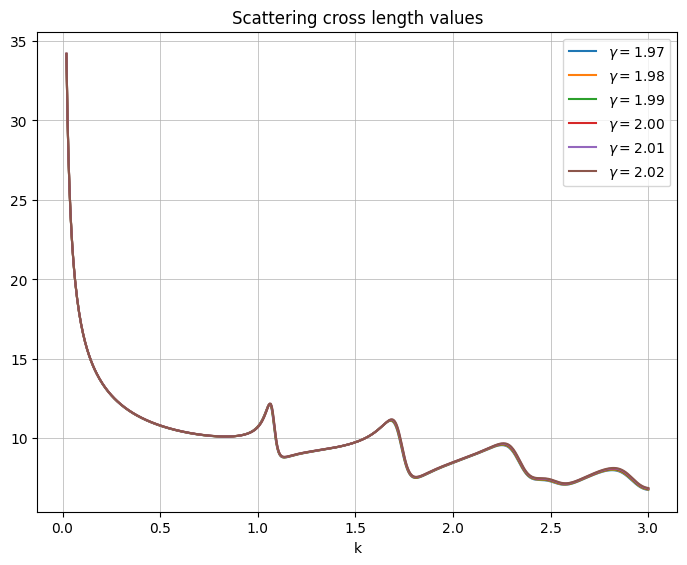

In [9]:
k_min = 0.02
k_max = 3.0
k = np.linspace(k_min, k_max, 596)

fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(k, l_array[0], ls='-', label=f"$\gamma = 1.97$")
axes.plot(k, l_array[1], ls='-', label=f"$\gamma = 1.98$")
axes.plot(k, l_array[2], ls='-', label=f"$\gamma = 1.99$")
axes.plot(k, l_array[3], ls='-', label=f"$\gamma = 2.00$")
axes.plot(k, l_array[4], ls='-', label=f"$\gamma = 2.01$")
axes.plot(k, l_array[5], ls='-', label=f"$\gamma = 2.02$")
axes.set_title(f'Scattering cross length values')
axes.set_xlabel(f'k')
axes.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=0.5)

## Implementação da rede neural

### Definição dos inputs da rede

In [10]:
features = df.drop(columns=['gamma', 'R'])

features = features.to_numpy()

In [11]:
targets = df[['gamma', 'R']]

targets = targets.to_numpy()

In [12]:
print(features.shape)
print(targets.shape)

(55100, 603)
(55100, 2)


In [13]:
for _ in range(0):
    print('a')

### Definição da rede neural

A rede neural implementada é uma rede neural do tipo Multilayer Perceptron

In [14]:
def calculate_hidden_neurons(input_size, output_size):
    # Rule 1: The number of hidden neurons should be between the size of the input layer and the size of the output layer
    rule_1 = max(input_size, output_size)
    
    # Rule 2: The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
    rule_2 = int(2/3 * input_size + output_size)
    
    # Rule 3: The number of hidden neurons should be less than twice the size of the input layer
    rule_3 = min(2 * input_size - 1, input_size + input_size // 3)
    
    # The number of hidden neurons should be the minimum that satisfies all rules, so will be the input size + 1/3*input_size
    hidden_neurons = int(input_size + input_size/3)

    print(hidden_neurons)
    return 201

class GeneralizedMLP(nn.Module):
    def __init__(self, input_size, output_size, num_hidden_layers):
        super(GeneralizedMLP, self).__init__()
        hidden_neurons = calculate_hidden_neurons(input_size, output_size)
        
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_neurons))
        
        for _ in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_neurons, hidden_neurons))
        
        self.output_layer = nn.Linear(hidden_neurons, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.sigmoid(layer(x))

        x = self.sigmoid(self.output_layer(x))
        return x

Função para treinamento do modelo

In [15]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}')

Função para avaliar o modelo

In [16]:
def evaluate_model(model, criterion, test_loader):
    test_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    print(f'Test Loss: {test_loss/len(test_loader)}')

    return outputs

### Variáveis para o modelo, separação dos dados de teste e treino e etc

In [17]:
train, test_data = train_test_split(features, test_size = 0.2, random_state = 2)
real_train_data, validation_data = train_test_split(train, test_size = 0.3, random_state = 2)

train_target, test_target = train_test_split(targets, test_size = 0.2, random_state = 2)
real_train_target, validation_target = train_test_split(train_target, test_size = 0.3, random_state = 2)

input_size = 603
output_size = 2
batch_size = 200
num_epochs = 150
learning_rate = 0.001

data_train = torch.tensor(real_train_data, dtype=torch.float32)
target_train = torch.tensor(real_train_target, dtype=torch.float32)

data_val = torch.tensor(validation_data, dtype=torch.float32)
target_val = torch.tensor(validation_target, dtype=torch.float32)

data_test = torch.tensor(test_data, dtype=torch.float32)
target_test = torch.tensor(test_target, dtype=torch.float32)

print("Input Shapes:")
print(data_train.shape, data_val.shape, data_test.shape)
print("Target Shapes:")
print(target_train.shape, target_val.shape, target_test.shape)

Input Shapes:
torch.Size([30856, 603]) torch.Size([13224, 603]) torch.Size([11020, 603])
Target Shapes:
torch.Size([30856, 2]) torch.Size([13224, 2]) torch.Size([11020, 2])


In [18]:
# Data Loaders
train_dataset = torch.utils.data.TensorDataset(data_train, target_train)
val_dataset = torch.utils.data.TensorDataset(data_val, target_val)
test_dataset = torch.utils.data.TensorDataset(data_test, target_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Primeira rodada de treinamento

In [19]:
model = GeneralizedMLP(input_size, output_size, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)
evaluate_model(model, criterion, test_loader)

torch.save(model.state_dict(), 'mlp_weights.pth')

804
Epoch 1/150, Training Loss: 0.6368676893172726, Validation Loss: 0.5892041476804819
Epoch 2/150, Training Loss: 0.5705738667518861, Validation Loss: 0.5505996511053683
Epoch 3/150, Training Loss: 0.5583296143239544, Validation Loss: 0.5476096601628545
Epoch 4/150, Training Loss: 0.5562593936920166, Validation Loss: 0.5460128076930544
Epoch 5/150, Training Loss: 0.554595830171339, Validation Loss: 0.5452263381943774
Epoch 6/150, Training Loss: 0.554571420338846, Validation Loss: 0.5447568595409393
Epoch 7/150, Training Loss: 0.5541795836340997, Validation Loss: 0.5444194865760519
Epoch 8/150, Training Loss: 0.5546086576677138, Validation Loss: 0.5442322212368694
Epoch 9/150, Training Loss: 0.5541332433300633, Validation Loss: 0.5440828568899809
Epoch 10/150, Training Loss: 0.5536560789231331, Validation Loss: 0.5439288051270726
Epoch 11/150, Training Loss: 0.5533937867610685, Validation Loss: 0.5438429188372483
Epoch 12/150, Training Loss: 0.5531231814815152, Validation Loss: 0.5437

### Segunda rodada de treinamento

In [20]:
saved_state_dict = torch.load('mlp_weights.pth')

# Initialize the new model
extended_model = GeneralizedMLP(input_size, output_size, 2)

# Copy the weights of the hidden_layer to hidden_layer1

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')

804


KeyError: 'hidden_layer.weight'

### Terceira rodada de treinamento

In [ ]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = GeneralizedMLP(input_size, output_size, 3)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 2):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})

criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')


#### Quarta rodada de treinamento

In [ ]:
saved_state_dict = torch.load('generalized_mlp_weights.pth')

extended_model = GeneralizedMLP(input_size, output_size, 4)

extended_model.hidden_layers[0].load_state_dict({
    'weight': saved_state_dict['hidden_layers.0.weight'],
    'bias': saved_state_dict['hidden_layers.0.bias']
})

for i in range(1, 3):
    extended_model.hidden_layers[i].load_state_dict({
        'weight': saved_state_dict[f'hidden_layers.{i}.weight'],
        'bias': saved_state_dict[f'hidden_layers.{i}.bias']
})
    
criterion = nn.MSELoss()
optimizer = optim.Adam(extended_model.parameters(), lr=learning_rate)

# Train and evaluate the model
train_model(extended_model, criterion, optimizer, train_loader, val_loader, num_epochs)
evaluate_model(extended_model, criterion, test_loader)

torch.save(extended_model.state_dict(), 'generalized_mlp_weights.pth')